In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]
import sys
sys.path.append('../../core')
%matplotlib inline


In [3]:
import torch
torch.manual_seed(0)
import torch.optim as optim
import dojo
from display import*
from DNN import DNN


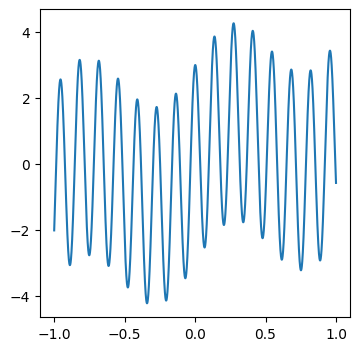

In [4]:

# experiment in stability of inverting frequency domain (0-inf) -> (inf to 0) as a way to have DNN learn high frequency features first

f = lambda x: np.sin(6*x) + 3*np.cos(46*x) + x
x = np.linspace(-1,1,10000)
plt.plot(x,f(x))

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ltx = torch.tensor(x).float().to(device)
lty = torch.tensor(f(x)*np.cos(46*x)).float().to(device)

In [33]:
D = dojo.dojo()
D.optimizer = lambda x : optim.Adam(x, lr=0.002)
D.epochs = 1000

In [34]:
D.max_batch_size=2000
lnet = DNN(sizes=[1,40,40,40,2], d2_input=False, classification=False) # expect 1.6% error rate
lnet.to(device)
report = D.train(lnet, ltx, lty, start_batch_size=2000)
ecran(lnet, ltx, lty, torch.nn.MSELoss(), report)

  0%|          | 0/1000 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2000 and 1x40)

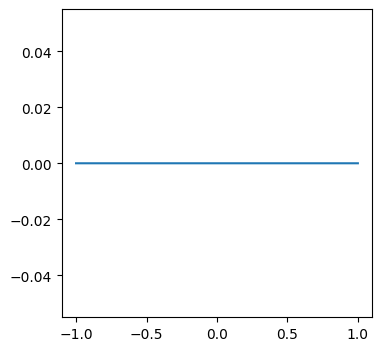

In [30]:
plt.plot(x,lnet(ltx).detach().cpu().numpy().reshape(-1)*np.cos(46*x))